This notebook looks at the antenna-based (e.g., bandpass solutions) stability, specifically focusing on RT7 before and after it was recabled.

It should be run on happili-02

It uses the functionality in bp.py, with updates and adaptations as needed for the new crosscal module. While cross-calibration is now done in CASA, this notebook uses mfcal in miriad to reduce the amount of work that needs to be redone/adapated.

There are four sets of beams to focus on:
- 3C48, compound beam 0: 181102012, 181109011
- 3C286, element beam 0: 181102013, 181109012
- 3C38, compound beam 33: 181102014, 181109013
- 3C286, element beam 33: 181102015, 181109014

Note that the element beam 33 observations will have the wrong coordinates in the header and need to be updated and have uvcoords recomputed. Use code in shakedown notebook for doing that.

In [1]:
#set up a log and import the things I need

%config IPCompleter.greedy=True
%matplotlib notebook
import apercal.libs.lib as lib
lib.setup_logger('info', logfile='/home/adams/commissioning/bandpass/logs/recabling_RT7.log')
import apercal

import bp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import apercal.subs as subs

root - INFO : Logging started!
root - INFO : To see the log in a bash window use the following command:
root - INFO : tail -n +1 -f /home/adams/commissioning/bandpass/logs/recabling_RT7.log


In [2]:
#define a global cfg file that will use as needed
#will work on defining everything by hand w/in code, so values aren't the most important
cfgfile = '/home/adams/commissioning/bandpass/cfg/recable_RT7.cfg'

# Element beam 00

### Get the data

In [ ]:
#Start by getting the data
#want to focus on central element first - simplest

#get data for these two scans to start
prepare = apercal.prepare(cfgfile)
prepare.show()

In [ ]:
prepare.basedir = '/data/adams/apertif/recable/181109012/'
prepare.go()

In [ ]:
prepare.basedir = '/data/adams/apertif/recable/181102013/'
prepare.prepare_date = '181102'
prepare.prepare_obsnum_fluxcal = '013'
prepare.show()

In [ ]:
prepare.go()

### Flag the data

In [5]:
#run preflag module on the data 
preflag=apercal.preflag(cfgfile)
preflag.basedir='/data/adams/apertif/recable/181109012/'
preflag.show(showall=True)

config - INFO :  Configuration file /home/adams/commissioning/bandpass/cfg/recable_RT7.cfg successfully read!
apercal.libs.lib - INFO : INITIAL
apercal.libs.lib - INFO : 	fluxcal = 3C286.MS
apercal.libs.lib - INFO : 	polcal = 
apercal.libs.lib - INFO : 	target = 
apercal.libs.lib - INFO : 	basedir = /data/adams/apertif/recable/181109012/
apercal.libs.lib - INFO : 	beam = 00
apercal.libs.lib - INFO : 	rawsubdir = raw
apercal.libs.lib - INFO : 	crosscalsubdir = crosscal
apercal.libs.lib - INFO : 	selfcalsubdir = selfcal
apercal.libs.lib - INFO : 	linesubdir = line
apercal.libs.lib - INFO : 	contsubdir = continuum
apercal.libs.lib - INFO : 	polsubdir = polarisation
apercal.libs.lib - INFO : 	mossubdir = mosaics
apercal.libs.lib - INFO : 	transfersubdir = transfer
apercal.libs.lib - INFO : 	subdirification = True
apercal.libs.lib - INFO : PREPARE
apercal.libs.lib - INFO : 	prepare_date = 181109
apercal.libs.lib - INFO : 	prepare_obsnum_fluxcal = 012
apercal.libs.lib - INFO : 	prepare_obsnu

In [6]:
preflag.go()

apercal.modules.preflag - INFO : Starting Pre-flagging step
apercal.modules.preflag - INFO : Flagging shadowed antennas
apercal.modules.preflag - WARNING : Polarised calibrator dataset not specified or dataset not available. Not flagging shadowed antennas for polarised calibrator
apercal.modules.preflag - WARNING : No target dataset specified! Not flagging shadowed antennas for target datasets
apercal.modules.preflag - INFO : Flagging subband edges
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Subband edges of polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Subband edges of target dataset(s) will not be flagged!
apercal.modules.preflag - INFO : Flagging ghost channels
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Ghosts in polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Ghosts in target dataset(s) will no

In [7]:
preflag.basedir='/data/adams/apertif/recable/181102013/'
preflag.show(showall=True)

apercal.libs.lib - INFO : INITIAL
apercal.libs.lib - INFO : 	fluxcal = 3C286.MS
apercal.libs.lib - INFO : 	polcal = 
apercal.libs.lib - INFO : 	target = 
apercal.libs.lib - INFO : 	basedir = /data/adams/apertif/recable/181102013/
apercal.libs.lib - INFO : 	beam = 00
apercal.libs.lib - INFO : 	rawsubdir = raw
apercal.libs.lib - INFO : 	crosscalsubdir = crosscal
apercal.libs.lib - INFO : 	selfcalsubdir = selfcal
apercal.libs.lib - INFO : 	linesubdir = line
apercal.libs.lib - INFO : 	contsubdir = continuum
apercal.libs.lib - INFO : 	polsubdir = polarisation
apercal.libs.lib - INFO : 	mossubdir = mosaics
apercal.libs.lib - INFO : 	transfersubdir = transfer
apercal.libs.lib - INFO : 	subdirification = True
apercal.libs.lib - INFO : PREPARE
apercal.libs.lib - INFO : 	prepare_date = 181109
apercal.libs.lib - INFO : 	prepare_obsnum_fluxcal = 012
apercal.libs.lib - INFO : 	prepare_obsnum_polcal = 
apercal.libs.lib - INFO : 	prepare_obsnum_target = 
apercal.libs.lib - INFO : 	prepare_target_beam

In [9]:
preflag.go()

apercal.modules.preflag - INFO : Starting Pre-flagging step
apercal.modules.preflag - INFO : Starting Pre-flagging step
apercal.modules.preflag - INFO : Flagging shadowed antennas
apercal.modules.preflag - INFO : Flagging shadowed antennas
apercal.modules.preflag - WARNING : Polarised calibrator dataset not specified or dataset not available. Not flagging shadowed antennas for polarised calibrator
apercal.modules.preflag - WARNING : Polarised calibrator dataset not specified or dataset not available. Not flagging shadowed antennas for polarised calibrator
apercal.modules.preflag - WARNING : No target dataset specified! Not flagging shadowed antennas for target datasets
apercal.modules.preflag - WARNING : No target dataset specified! Not flagging shadowed antennas for target datasets
apercal.modules.preflag - INFO : Flagging subband edges
apercal.modules.preflag - INFO : Flagging subband edges
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Subband edges o

### Convert the data

In [10]:
convert=apercal.convert(cfgfile)
convert.basedir='/data/adams/apertif/recable/181109012/'
convert.show(showall=True)

config - INFO :  Configuration file /home/adams/commissioning/bandpass/cfg/recable_RT7.cfg successfully read!
config - INFO :  Configuration file /home/adams/commissioning/bandpass/cfg/recable_RT7.cfg successfully read!
apercal.libs.lib - INFO : INITIAL
apercal.libs.lib - INFO : INITIAL
apercal.libs.lib - INFO : 	fluxcal = 3C286.MS
apercal.libs.lib - INFO : 	fluxcal = 3C286.MS
apercal.libs.lib - INFO : 	polcal = 
apercal.libs.lib - INFO : 	polcal = 
apercal.libs.lib - INFO : 	target = 
apercal.libs.lib - INFO : 	target = 
apercal.libs.lib - INFO : 	basedir = /data/adams/apertif/recable/181109012/
apercal.libs.lib - INFO : 	basedir = /data/adams/apertif/recable/181109012/
apercal.libs.lib - INFO : 	beam = 00
apercal.libs.lib - INFO : 	beam = 00
apercal.libs.lib - INFO : 	rawsubdir = raw
apercal.libs.lib - INFO : 	rawsubdir = raw
apercal.libs.lib - INFO : 	crosscalsubdir = crosscal
apercal.libs.lib - INFO : 	crosscalsubdir = crosscal
apercal.libs.lib - INFO : 	selfcalsubdir = selfcal
ape

In [ ]:
convert.go()

apercal.modules.convert - INFO : FILE CONVERSION started
apercal.modules.convert - INFO : FILE CONVERSION started
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.modules.convert - WARNING : Target beam dataset not specified. Cannot convert target beams!
apercal.modules.convert - WARNING : Target beam dataset not specified. Cannot convert target beams!
apercal.modules.convert - WARNING : Flux calibrator does not have a corrected_data column! Using uncorrecteddata for conversion!
apercal.modules.convert - WARNING : Flux calibrator does not have a corrected_data column! Using uncorrecteddata for conversion!


Successful readonly open of default-locked table /data/adams/apertif/recable/181109012/00/raw/3C286.MS: 23 columns, 105144 rows


In [12]:
convert.basedir='/data/adams/apertif/recable/181102013/'
convert.show(showall=True)

apercal.libs.lib - INFO : INITIAL
apercal.libs.lib - INFO : INITIAL
apercal.libs.lib - INFO : 	fluxcal = 3C286.MS
apercal.libs.lib - INFO : 	fluxcal = 3C286.MS
apercal.libs.lib - INFO : 	polcal = 
apercal.libs.lib - INFO : 	polcal = 
apercal.libs.lib - INFO : 	target = 
apercal.libs.lib - INFO : 	target = 
apercal.libs.lib - INFO : 	basedir = /data/adams/apertif/recable/181102013/
apercal.libs.lib - INFO : 	basedir = /data/adams/apertif/recable/181102013/
apercal.libs.lib - INFO : 	beam = 00
apercal.libs.lib - INFO : 	beam = 00
apercal.libs.lib - INFO : 	rawsubdir = raw
apercal.libs.lib - INFO : 	rawsubdir = raw
apercal.libs.lib - INFO : 	crosscalsubdir = crosscal
apercal.libs.lib - INFO : 	crosscalsubdir = crosscal
apercal.libs.lib - INFO : 	selfcalsubdir = selfcal
apercal.libs.lib - INFO : 	selfcalsubdir = selfcal
apercal.libs.lib - INFO : 	linesubdir = line
apercal.libs.lib - INFO : 	linesubdir = line
apercal.libs.lib - INFO : 	contsubdir = continuum
apercal.libs.lib - INFO : 	conts

In [14]:
convert.go()

apercal.modules.convert - INFO : FILE CONVERSION started
apercal.modules.convert - INFO : FILE CONVERSION started
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.modules.convert - WARNING : Target beam dataset not specified. Cannot convert target beams!
apercal.modules.convert - WARNING : Target beam dataset not specified. Cannot convert target beams!
apercal.modules.convert - INFO : Flux calibrator dataset was already converted from MS to UVFITS format
apercal.modules.convert - INFO : Flux calibrator dataset was already converted from MS to UVFITS format
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.mo

RuntimeError: 

### Get bandpass solutions

In [17]:
def do_bp(workingdir,fluxcal,inttime='30'):
    #function to do the bandpass solution, for given interval                   
    #inttime is the solution interval for bandpass, in minutes                  
    #change to working directory
    #workaround for long path names
    #workingdir = basedir+'00/crosscal/'
    os.chdir(workingdir)
    #subs.managefiles.director(ccal,'ch',ccal.crosscaldir)
    #ccal.director('ch', ccal.crosscaldir)  # outdated
    gainint=inttime
    gapint=inttime
    bpint=inttime
    mfcal = lib.miriad('mfcal')
    mfcal.vis = fluxcal
    #print mfcal.vis
    #print mfcal.vis                                                            
    # Comment the next line out if you don't want to solve for delays           
    mfcal.options = 'delay'
    mfcal.stokes = 'XX'
    mfcal.interval = gainint + ',' + gapint + ',' + bpint
    mfcal.tol = 0.1 # Set the tolerance a bit lower. Otherwise mfcal takes a long time to finsh                                                                
    mfcal.go()
    print 'calibration finished'

In [60]:
#first, need to flag YY polarization - this will throw solutions totally off!
workingdir='/data/adams/apertif/recable/181109012/00/crosscal/'
source = '3C286.mir'
os.chdir(workingdir)
uvflag=lib.miriad('uvflag')
uvflag.vis = source
uvflag.select="'polarization(yy)'"
uvflag.flagval='flag'
uvflag.go()

['',
 'uvflag: Revision 1.8, 2014/09/30 14:23:39 UTC',
 '',
 '',
 'Set flags to indicate bad data in visibility file 3C286.mir',
 'All line channels and all wideband channels selected',
 '',
 'Overview of flagging on visibility file 3C286.mir',
 'Changed flags set to FALSE (data flagged as bad)',
 'Total number of records selected: 105144; out of 420576 records',
 'Antennas used: 1-12',
 'Counts of correlations within selected channels',
 'channel   Originally    Currently',
 'Good:       947982306.           0.    Changed to bad:   947982306.',
 'Bad:        774696990.  1722679296.',
 'wide      Originally    Currently',
 'Good:               0.           0.    Changed to bad:           0.',
 'Bad:                0.           0.']

In [61]:
inttime='30'
do_bp('/data/adams/apertif/recable/181109012/00/crosscal/','3C286.mir',inttime='30')

calibration finished


In [62]:
workingdir='/data/adams/apertif/recable/181102013/00/crosscal/'
source = '3C286.mir'
os.chdir(workingdir)
uvflag=lib.miriad('uvflag')
uvflag.vis = source
uvflag.select="'polarization(yy)'"
uvflag.flagval='flag'
uvflag.go()

['',
 'uvflag: Revision 1.8, 2014/09/30 14:23:39 UTC',
 '',
 '',
 'Set flags to indicate bad data in visibility file 3C286.mir',
 'All line channels and all wideband channels selected',
 '',
 'Overview of flagging on visibility file 3C286.mir',
 'Changed flags set to FALSE (data flagged as bad)',
 'Total number of records selected: 105144; out of 420576 records',
 'Antennas used: 1-12',
 'Counts of correlations within selected channels',
 'channel   Originally    Currently',
 'Good:       990283704.           0.    Changed to bad:   990283704.',
 'Bad:        732395592.  1722679296.',
 'wide      Originally    Currently',
 'Good:               0.           0.    Changed to bad:           0.',
 'Bad:                0.           0.']

In [63]:
inttime='30'
do_bp('/data/adams/apertif/recable/181102013/00/crosscal','3C286.mir',inttime='30')

calibration finished


In [18]:
def get_bpsols(workingdir,fluxcal):
    #function to read solutions and return arrays of values and freqs           
    #now read solutions and put into array to return                            
    #ccal=apercal.ccal(cfgfile)
    values,freqs = subs.readmirlog.get_bp(workingdir + fluxcal)
    #replace all zeros with nans before returning.                              
    values[values==0] = np.nan
    print 'read calibration solutions into numpy array'
    return values,freqs

In [79]:
values_before,freqs_b = get_bpsols('/data/adams/apertif/recable/181102013/00/crosscal/','3C286.mir')
values_after,freqs_a = get_bpsols('/data/adams/apertif/recable/181109012/00/crosscal/','3C286.mir')

read calibration solutions into numpy array
read calibration solutions into numpy array


### Visualize stability

In [65]:
#define the telescope names
#this is used generally throughout the notebook
#If I was using CASA for getting BP solutions, I could get this directly from MS
#oh well - that's a future adaptation (would have to figure out CASA command, how to parse MS)
tnames = ('RT2','RT3','RT4','RT5','RT6','RT7','RT8','RT9','RTA','RTB','RTC','RTD')
print len(tnames)  #better be 12!

12


In [66]:
#Check where I am - want to make sure I know where images are written to. 
#Put in global recable directory
os.chdir('/home/adams/commissioning/bandpass/img')

print 'Working in {} and images will be written there.'.format(os.getcwd())

Working in /home/adams/commissioning/bandpass/img and images will be written there.


In [87]:
normvals_before, avfreqs_before = bp.get_norm_bpsols(values_before,freqs_b,nchan=8,normscan=0)
normvals_after, avfreqs_after = bp.get_norm_bpsols(values_after,freqs_a,nchan=8,normscan=0)

<IPython.core.display.Javascript object>


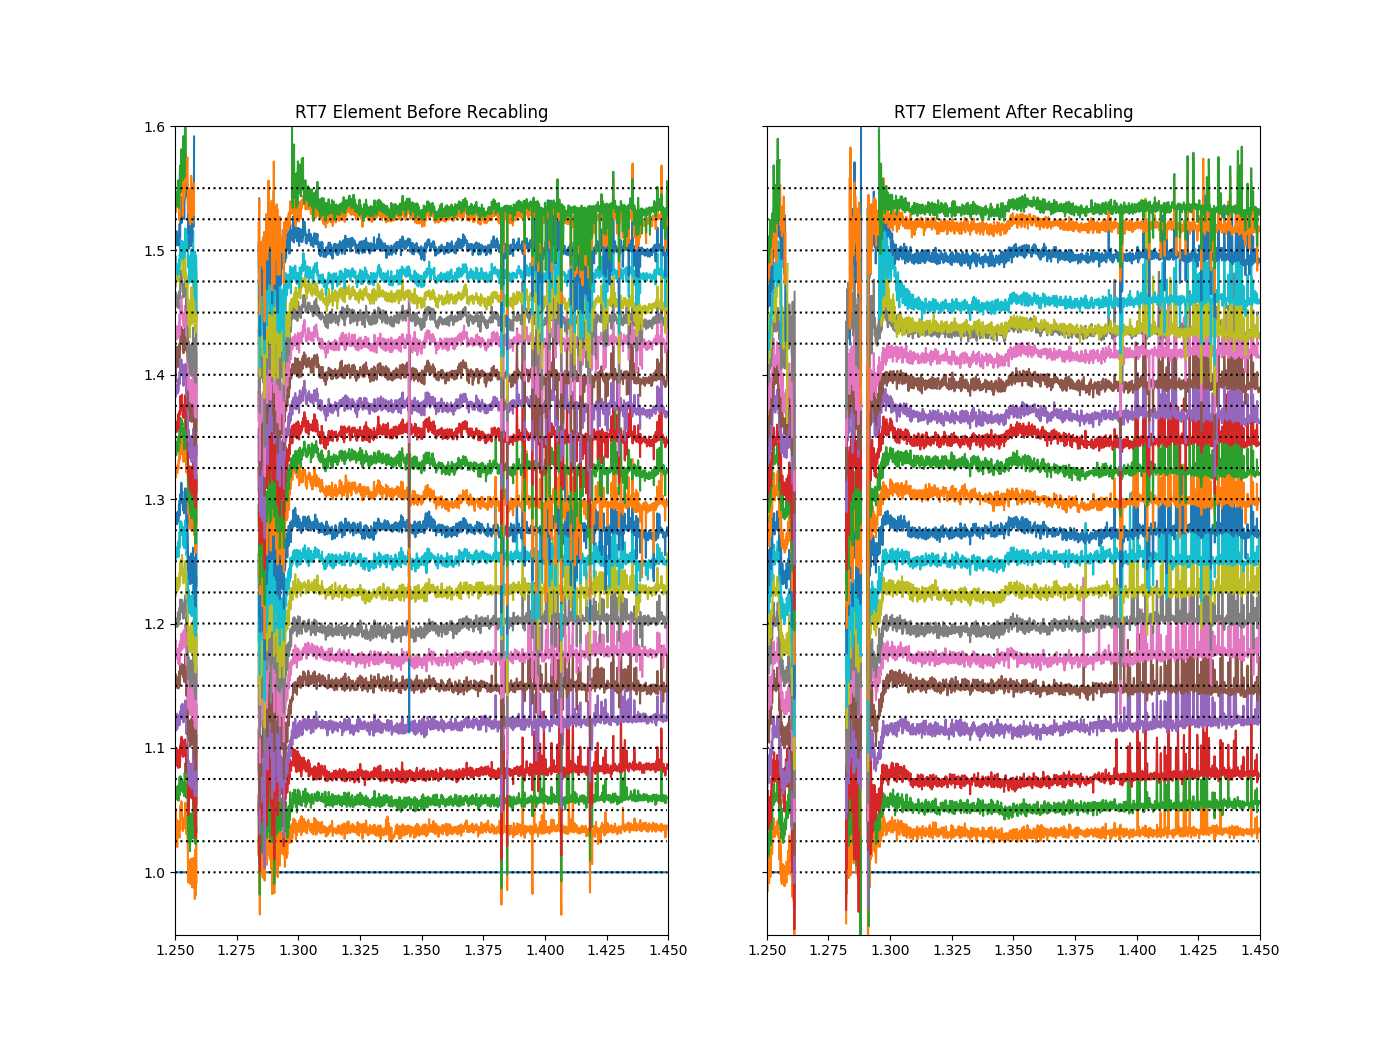

In [89]:
#make a plot just for RT7, showing element beam 0 before and after recabling
##now make a plot just for RT4, picking common frequency range of 1300-1390, showing the three observations side-by-side
offset=0.025
ymin=0.95
ymax=1.6
plotsize = 7


ysize=plotsize*1.5
xsize=plotsize*2
fig, (axb,axa)= plt.subplots(1,2,figsize=(xsize,ysize),sharex=True,sharey=True)
plt.title('RT7, Element beam 00, Channel averaging = 8')
xmin = 1.25 #np.nanmin(avfreqs_brc)
xmax = 1.45 #np.nanmax(avfreqs_brc)



for sol in range(normvals_before.shape[2]):
    axb.plot(avfreqs_before, (normvals_before[5,:,sol] + np.full(normvals_before.shape[1],offset*sol)))
    axb.plot(avfreqs_before, np.full(normvals_before.shape[1],1.+offset*sol),'k:')
axb.set_title('RT7 Element Before Recabling')  
axb.axis([xmin,xmax,ymin,ymax]) # Limit the plot to the minimum and maximum frequencies


for sol in range(normvals_after.shape[2]):
    axa.plot(avfreqs_after, (normvals_after[5,:,sol] + np.full(normvals_after.shape[1],offset*sol)))
    axa.plot(avfreqs_after, np.full(normvals_after.shape[1],1.+offset*sol),'k:')
axa.set_title('RT7 Element After Recabling') 

plt.savefig('RT7_EB0_comp.png')

<IPython.core.display.Javascript object>


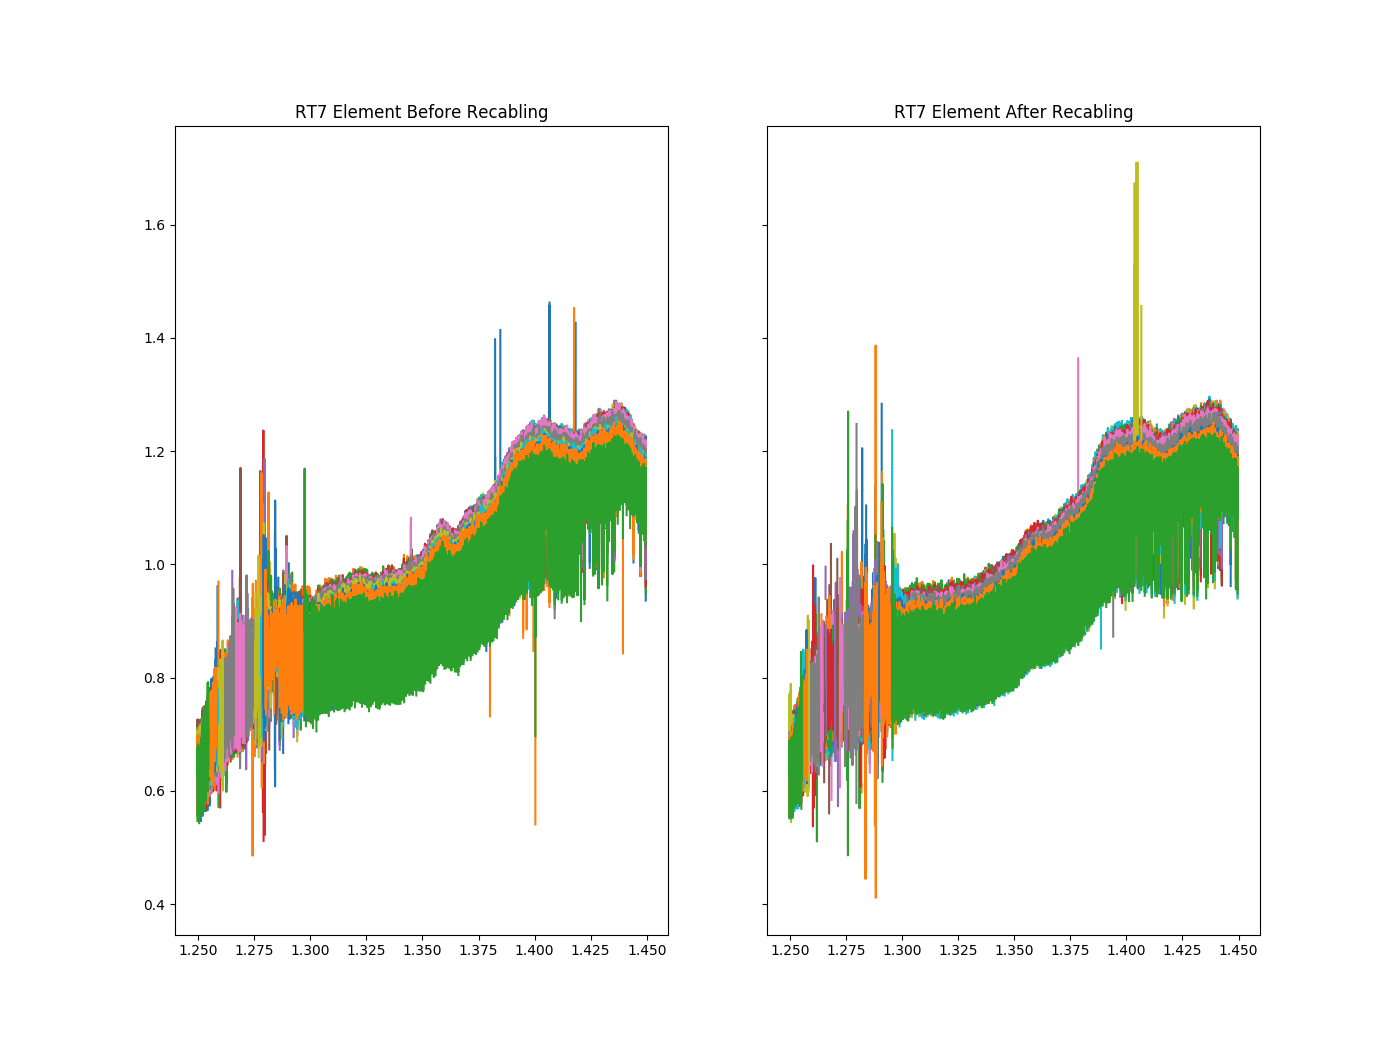

In [86]:
#these solutions don't seem normalized to 1, so I want to do some quick checks of that
#plot the bandpass solution for each interval for RT7, not normalized
#and without offsets

offset=0.025
ymin=0.95
ymax=1.6
plotsize = 7


ysize=plotsize*1.5
xsize=plotsize*2
fig, (axb,axa)= plt.subplots(1,2,figsize=(xsize,ysize),sharex=True,sharey=True)
plt.title('RT7, Element beam 00, Channel averaging = 8')
xmin = 1.25 #np.nanmin(avfreqs_brc)
xmax = 1.45 #np.nanmax(avfreqs_brc)



for sol in range(values_before.shape[2]):
    axb.plot(freqs_b, values_before[5,:,sol])
axb.set_title('RT7 Element Before Recabling')  
#axb.axis([xmin,xmax,ymin,ymax]) # Limit the plot to the minimum and maximum frequencies


for sol in range(values_after.shape[2]):
    axa.plot(freqs_a, values_after[5,:,sol] )
axa.set_title('RT7 Element After Recabling')

plt.savefig('RT7_EB0_overlay.png')


# Compound beam 00

### Get the data

In [3]:
#Start by getting the data
#want to focus on central element first - simplest

#get data for these two scans to start
prepare = apercal.prepare(cfgfile)
prepare.basedir = '/data/adams/apertif/recable/181109011/'
prepare.prepare_date = '181109'
prepare.prepare_obsnum_fluxcal = '011'
prepare.fluxcal='3C48.MS'
prepare.show(showall=True)

config - INFO :  Configuration file /home/adams/commissioning/bandpass/cfg/recable_RT7.cfg successfully read!
apercal.libs.lib - INFO : INITIAL
apercal.libs.lib - INFO : 	fluxcal = 3C48.MS
apercal.libs.lib - INFO : 	polcal = 
apercal.libs.lib - INFO : 	target = 
apercal.libs.lib - INFO : 	basedir = /data/adams/apertif/recable/181109011/
apercal.libs.lib - INFO : 	beam = 00
apercal.libs.lib - INFO : 	rawsubdir = raw
apercal.libs.lib - INFO : 	crosscalsubdir = crosscal
apercal.libs.lib - INFO : 	selfcalsubdir = selfcal
apercal.libs.lib - INFO : 	linesubdir = line
apercal.libs.lib - INFO : 	contsubdir = continuum
apercal.libs.lib - INFO : 	polsubdir = polarisation
apercal.libs.lib - INFO : 	mossubdir = mosaics
apercal.libs.lib - INFO : 	transfersubdir = transfer
apercal.libs.lib - INFO : 	subdirification = True
apercal.libs.lib - INFO : PREPARE
apercal.libs.lib - INFO : 	prepare_date = 181109
apercal.libs.lib - INFO : 	prepare_obsnum_fluxcal = 011
apercal.libs.lib - INFO : 	prepare_obsnum

In [4]:
prepare.go()

apercal.modules.prepare - INFO : Preparing data for calibration
apercal.modules.prepare - WARNING : No polarisation calibrator dataset specified. Polarisation calibration will not work!
apercal.modules.prepare - WARNING : No target datasets specified!
apercal.modules.prepare - INFO : Data prepared for calibration


In [5]:
prepare.basedir = '/data/adams/apertif/recable/181102012/'
prepare.prepare_date = '181102'
prepare.prepare_obsnum_fluxcal = '012'
prepare.show()

apercal.libs.lib - INFO : PREPARE
apercal.libs.lib - INFO : 	prepare_date = 181102
apercal.libs.lib - INFO : 	prepare_obsnum_fluxcal = 012
apercal.libs.lib - INFO : 	prepare_obsnum_polcal = 
apercal.libs.lib - INFO : 	prepare_obsnum_target = 
apercal.libs.lib - INFO : 	prepare_target_beams = 00
apercal.libs.lib - INFO : 	prepare_bypass_alta = False


In [6]:
prepare.go()

apercal.modules.prepare - INFO : Preparing data for calibration
apercal.modules.prepare - WARNING : No polarisation calibrator dataset specified. Polarisation calibration will not work!
apercal.modules.prepare - WARNING : No target datasets specified!
apercal.modules.prepare - INFO : Data prepared for calibration


### Flag the data

In [7]:
#run preflag module on the data 
preflag=apercal.preflag(cfgfile)
preflag.basedir='/data/adams/apertif/recable/181109011/'
preflag.fluxcal='3C48.MS'
preflag.show()

config - INFO :  Configuration file /home/adams/commissioning/bandpass/cfg/recable_RT7.cfg successfully read!
apercal.libs.lib - INFO : PREFLAG
apercal.libs.lib - INFO : 	preflag_shadow = True
apercal.libs.lib - INFO : 	preflag_edges = True
apercal.libs.lib - INFO : 	preflag_ghosts = True
apercal.libs.lib - INFO : 	preflag_manualflag = True
apercal.libs.lib - INFO : 	preflag_manualflag_fluxcal = True
apercal.libs.lib - INFO : 	preflag_manualflag_polcal = False
apercal.libs.lib - INFO : 	preflag_manualflag_target = False
apercal.libs.lib - INFO : 	preflag_manualflag_targetbeams = all
apercal.libs.lib - INFO : 	preflag_manualflag_auto = True
apercal.libs.lib - INFO : 	preflag_manualflag_antenna = 
apercal.libs.lib - INFO : 	preflag_manualflag_corr = 
apercal.libs.lib - INFO : 	preflag_manualflag_baseline = 
apercal.libs.lib - INFO : 	preflag_manualflag_channel = 
apercal.libs.lib - INFO : 	preflag_manualflag_time = 
apercal.libs.lib - INFO : 	preflag_aoflagger = True
apercal.libs.lib - I

In [8]:
preflag.go()

apercal.modules.preflag - INFO : Starting Pre-flagging step
apercal.modules.preflag - INFO : Flagging shadowed antennas
apercal.modules.preflag - WARNING : Polarised calibrator dataset not specified or dataset not available. Not flagging shadowed antennas for polarised calibrator
apercal.modules.preflag - WARNING : No target dataset specified! Not flagging shadowed antennas for target datasets
apercal.modules.preflag - INFO : Flagging subband edges
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Subband edges of polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Subband edges of target dataset(s) will not be flagged!
apercal.modules.preflag - INFO : Flagging ghost channels
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Ghosts in polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Ghosts in target dataset(s) will no

In [9]:
preflag.basedir='/data/adams/apertif/recable/181102012/'
preflag.show()

apercal.libs.lib - INFO : PREFLAG
apercal.libs.lib - INFO : 	preflag_shadow = True
apercal.libs.lib - INFO : 	preflag_edges = True
apercal.libs.lib - INFO : 	preflag_ghosts = True
apercal.libs.lib - INFO : 	preflag_manualflag = True
apercal.libs.lib - INFO : 	preflag_manualflag_fluxcal = True
apercal.libs.lib - INFO : 	preflag_manualflag_polcal = False
apercal.libs.lib - INFO : 	preflag_manualflag_target = False
apercal.libs.lib - INFO : 	preflag_manualflag_targetbeams = all
apercal.libs.lib - INFO : 	preflag_manualflag_auto = True
apercal.libs.lib - INFO : 	preflag_manualflag_antenna = 
apercal.libs.lib - INFO : 	preflag_manualflag_corr = 
apercal.libs.lib - INFO : 	preflag_manualflag_baseline = 
apercal.libs.lib - INFO : 	preflag_manualflag_channel = 
apercal.libs.lib - INFO : 	preflag_manualflag_time = 
apercal.libs.lib - INFO : 	preflag_aoflagger = True
apercal.libs.lib - INFO : 	preflag_aoflagger_bandpass = True
apercal.libs.lib - INFO : 	preflag_aoflagger_fluxcal = True
apercal.l

In [10]:
preflag.go()

apercal.modules.preflag - INFO : Starting Pre-flagging step
apercal.modules.preflag - INFO : Flagging shadowed antennas
apercal.modules.preflag - WARNING : Polarised calibrator dataset not specified or dataset not available. Not flagging shadowed antennas for polarised calibrator
apercal.modules.preflag - WARNING : No target dataset specified! Not flagging shadowed antennas for target datasets
apercal.modules.preflag - INFO : Flagging subband edges
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Subband edges of polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Subband edges of target dataset(s) will not be flagged!
apercal.modules.preflag - INFO : Flagging ghost channels
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Ghosts in polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Ghosts in target dataset(s) will no

### Convert the data

In [11]:
convert=apercal.convert(cfgfile)
convert.basedir='/data/adams/apertif/recable/181109011/'
convert.fluxcal='3C48.MS'
convert.show()

config - INFO :  Configuration file /home/adams/commissioning/bandpass/cfg/recable_RT7.cfg successfully read!
apercal.libs.lib - INFO : CONVERT
apercal.libs.lib - INFO : 	convert_fluxcal = True
apercal.libs.lib - INFO : 	convert_polcal = False
apercal.libs.lib - INFO : 	convert_target = False
apercal.libs.lib - INFO : 	convert_targetbeams = all
apercal.libs.lib - INFO : 	convert_removeuvfits = True


In [12]:
convert.go()

apercal.modules.convert - INFO : FILE CONVERSION started
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.modules.convert - WARNING : Target beam dataset not specified. Cannot convert target beams!
apercal.modules.convert - WARNING : Flux calibrator does not have a corrected_data column! Using uncorrecteddata for conversion!


Successful readonly open of default-locked table /data/adams/apertif/recable/181109011/00/raw/3C48.MS: 23 columns, 105144 rows


apercal.modules.convert - INFO : Converted flux calibrator dataset from MS to UVFITS format!
apercal.modules.convert - WARNING : Not converting polarised calibrator dataset!
apercal.modules.convert - WARNING : Not converting target beam dataset(s)!
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.modules.convert - WARNING : Target beam dataset not specified. Cannot convert target beams!
apercal.modules.convert - INFO : Converted flux calibrator dataset from UVFITS to MIRIAD format!
apercal.modules.convert - WARNING : Not converting polarised calibrator dataset!
apercal.modules.convert - WARNING : Not converting target beam dataset(s)!
apercal.modules.convert - INFO : Removing all UVFITS files


RuntimeError: 

In [13]:
convert.basedir='/data/adams/apertif/recable/181102012/'
convert.show()

apercal.libs.lib - INFO : CONVERT
apercal.libs.lib - INFO : 	convert_fluxcal = True
apercal.libs.lib - INFO : 	convert_polcal = False
apercal.libs.lib - INFO : 	convert_target = False
apercal.libs.lib - INFO : 	convert_targetbeams = all
apercal.libs.lib - INFO : 	convert_removeuvfits = True


In [14]:
convert.go()

apercal.modules.convert - INFO : FILE CONVERSION started
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.modules.convert - WARNING : Target beam dataset not specified. Cannot convert target beams!
apercal.modules.convert - WARNING : Flux calibrator does not have a corrected_data column! Using uncorrecteddata for conversion!


Successful readonly open of default-locked table /data/adams/apertif/recable/181102012/00/raw/3C48.MS: 23 columns, 105144 rows


apercal.modules.convert - INFO : Converted flux calibrator dataset from MS to UVFITS format!
apercal.modules.convert - WARNING : Not converting polarised calibrator dataset!
apercal.modules.convert - WARNING : Not converting target beam dataset(s)!
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.modules.convert - WARNING : Target beam dataset not specified. Cannot convert target beams!
apercal.modules.convert - INFO : Converted flux calibrator dataset from UVFITS to MIRIAD format!
apercal.modules.convert - WARNING : Not converting polarised calibrator dataset!
apercal.modules.convert - WARNING : Not converting target beam dataset(s)!
apercal.modules.convert - INFO : Removing all UVFITS files


RuntimeError: 

### Get bandpass solutions

In [69]:
#first, need to flag YY polarization - this will throw solutions totally off!
workingdir='/data/adams/apertif/recable/181109011/00/crosscal/'
source = '3C48.mir'
os.chdir(workingdir)
uvflag=lib.miriad('uvflag')
uvflag.vis = source
uvflag.select="'polarization(yy)'"
uvflag.flagval='flag'
uvflag.go()

['',
 'uvflag: Revision 1.8, 2014/09/30 14:23:39 UTC',
 '',
 '',
 'Set flags to indicate bad data in visibility file 3C48.mir',
 'All line channels and all wideband channels selected',
 '',
 'Overview of flagging on visibility file 3C48.mir',
 'Changed flags set to FALSE (data flagged as bad)',
 'Total number of records selected: 105144; out of 420576 records',
 'Antennas used: 1-12',
 'Counts of correlations within selected channels',
 'channel   Originally    Currently',
 'Good:      1017975947.           0.    Changed to bad:  1017975947.',
 'Bad:        704703349.  1722679296.',
 'wide      Originally    Currently',
 'Good:               0.           0.    Changed to bad:           0.',
 'Bad:                0.           0.']

In [70]:
inttime='30'
do_bp('/data/adams/apertif/recable/181109011/00/crosscal/','3C48.mir',inttime='30')

calibration finished


In [71]:
#first, need to flag YY polarization - this will throw solutions totally off!
workingdir='/data/adams/apertif/recable/181102012/00/crosscal/'
source = '3C48.mir'
os.chdir(workingdir)
uvflag=lib.miriad('uvflag')
uvflag.vis = source
uvflag.select="'polarization(yy)'"
uvflag.flagval='flag'
uvflag.go()

['',
 'uvflag: Revision 1.8, 2014/09/30 14:23:39 UTC',
 '',
 '',
 'Set flags to indicate bad data in visibility file 3C48.mir',
 'All line channels and all wideband channels selected',
 '',
 'Overview of flagging on visibility file 3C48.mir',
 'Changed flags set to FALSE (data flagged as bad)',
 'Total number of records selected: 105144; out of 420576 records',
 'Antennas used: 1-12',
 'Counts of correlations within selected channels',
 'channel   Originally    Currently',
 'Good:      1032463514.           0.    Changed to bad:  1032463514.',
 'Bad:        690215782.  1722679296.',
 'wide      Originally    Currently',
 'Good:               0.           0.    Changed to bad:           0.',
 'Bad:                0.           0.']

In [72]:
inttime='30'
do_bp('/data/adams/apertif/recable/181102012/00/crosscal','3C48.mir',inttime='30')

calibration finished


In [90]:
values_before,freqs_b = get_bpsols('/data/adams/apertif/recable/181102012/00/crosscal/','3C48.mir')
values_after,freqs_a = get_bpsols('/data/adams/apertif/recable/181109011/00/crosscal/','3C48.mir')

read calibration solutions into numpy array
read calibration solutions into numpy array


### Visualize stability

In [91]:
#define the telescope names
#this is used generally throughout the notebook
#If I was using CASA for getting BP solutions, I could get this directly from MS
#oh well - that's a future adaptation (would have to figure out CASA command, how to parse MS)
tnames = ('RT2','RT3','RT4','RT5','RT6','RT7','RT8','RT9','RTA','RTB','RTC','RTD')
print len(tnames)  #better be 12!

12


In [92]:
#Check where I am - want to make sure I know where images are written to. 
#Put in global recable directory
os.chdir('/home/adams/commissioning/bandpass/img')

print 'Working in {} and images will be written there.'.format(os.getcwd())

Working in /home/adams/commissioning/bandpass/img and images will be written there.


In [97]:
normvals_before, avfreqs_before = bp.get_norm_bpsols(values_before,freqs_b,nchan=8,normscan=0)
normvals_after, avfreqs_after = bp.get_norm_bpsols(values_after,freqs_a,nchan=8,normscan=0)

<IPython.core.display.Javascript object>


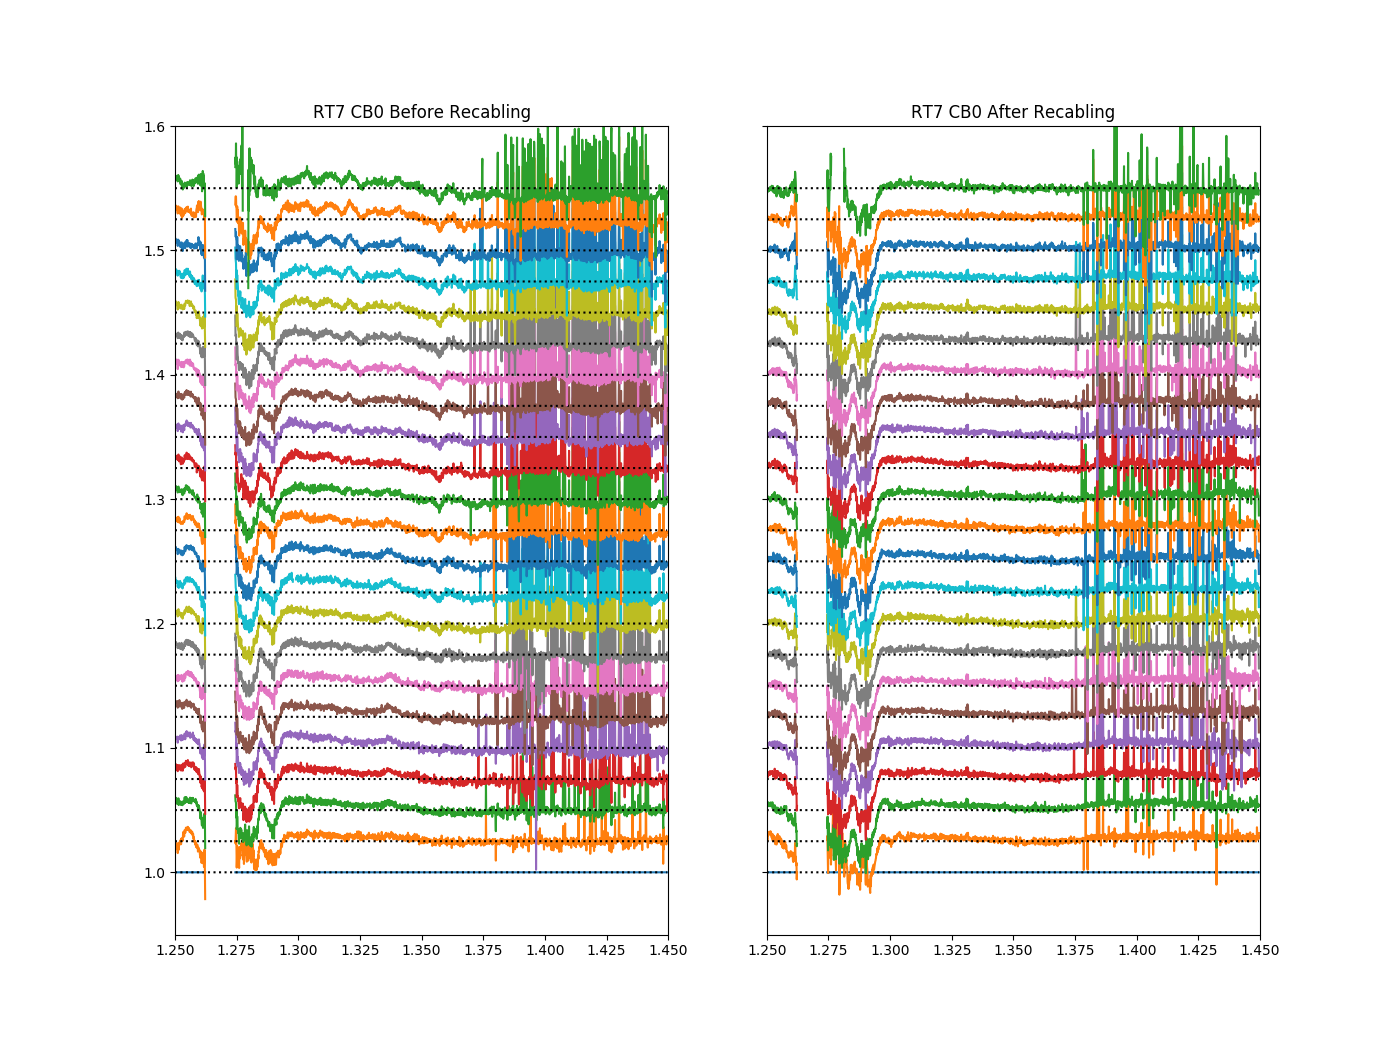

In [98]:
#make a plot just for RT7, showing element beam 0 before and after recabling
##now make a plot just for RT4, picking common frequency range of 1300-1390, showing the three observations side-by-side
offset=0.025
ymin=0.95
ymax=1.6
plotsize = 7


ysize=plotsize*1.5
xsize=plotsize*2
fig, (axb,axa)= plt.subplots(1,2,figsize=(xsize,ysize),sharex=True,sharey=True)
plt.title('RT7, Compound beam 00, Channel averaging = 8')
xmin = 1.25 #np.nanmin(avfreqs_brc)
xmax = 1.45 #np.nanmax(avfreqs_brc)



for sol in range(normvals_before.shape[2]):
    axb.plot(avfreqs_before, (normvals_before[5,:,sol] + np.full(normvals_before.shape[1],offset*sol)))
    axb.plot(avfreqs_before, np.full(normvals_before.shape[1],1.+offset*sol),'k:')
axb.set_title('RT7 CB0 Before Recabling')  
axb.axis([xmin,xmax,ymin,ymax]) # Limit the plot to the minimum and maximum frequencies


for sol in range(normvals_after.shape[2]):
    axa.plot(avfreqs_after, (normvals_after[5,:,sol] + np.full(normvals_after.shape[1],offset*sol)))
    axa.plot(avfreqs_after, np.full(normvals_after.shape[1],1.+offset*sol),'k:')
axa.set_title('RT7 CB0 After Recabling') 

plt.savefig('RT7_CB0_comp.png')

# Element beam 33


### Get the data

In [32]:
#Start by getting the data
#want to focus on central element first - simplest

#get data for these two scans to start
prepare = apercal.prepare(cfgfile)

config - INFO :  Configuration file /home/adams/commissioning/bandpass/cfg/recable_RT7.cfg successfully read!


In [43]:
prepare.basedir = '/data/adams/apertif/recable/181109014_B33/'
prepare.prepare_obsnum_fluxcal = '014'
prepare.prepare_target_beams = '33' 
prepare.fluxcal = '3C286.MS'
prepare.prepare_date = '181109'

#since i have a non-central beam but want to copy it to 00 anyway (to properly use preflag module)
#I'll just do this all myself

#first change to directory I want to be in
workingdir = prepare.basedir + '00/raw'
if os.path.exists(workingdir):
    os.chdir(workingdir)
else:
    os.makedirs(workingdir)
    os.chdir(workingdir)
    
print 'Working in {}'.format(os.getcwd())

#format command for getting data
string_command = "python /home/adams/altadata/getdata_alta.py {0} {1}-{1} {2:0>2}-{2:0>2}".format(prepare.prepare_date,
                                                                                                  prepare.prepare_obsnum_fluxcal,
                                                                                                  prepare.prepare_target_beams)

print string_command#filename = "WSRTA{0}_B{1:0>3}.MS".format(scan,beam)

Working in /data/adams/apertif/recable/181109014_B33/00/raw
python /home/adams/altadata/getdata_alta.py 181109 014-014 33-33


In [44]:
os.system(string_command)

0

In [46]:
#and move to a better name:
old_file = "WSRTA{0}{1}_B{2:0>3}.MS".format(prepare.prepare_date,
                                            prepare.prepare_obsnum_fluxcal,prepare.prepare_target_beams)
print old_file
new_file = prepare.fluxcal
print new_file

os.rename(old_file,new_file)  #be lazy because I know I changed to the right working directory above

WSRTA181109014_B033.MS
3C286.MS


OSError: [Errno 2] No such file or directory

In [47]:
prepare.basedir = '/data/adams/apertif/recable/181102015_B33/'
prepare.prepare_obsnum_fluxcal = '015'
prepare.prepare_target_beams = '33' 
prepare.fluxcal = '3C286.MS'
prepare.prepare_date = '181102'

#since i have a non-central beam but want to copy it to 00 anyway (to properly use preflag module)
#I'll just do this all myself

#first change to directory I want to be in
workingdir = prepare.basedir + '00/raw'
if os.path.exists(workingdir):
    os.chdir(workingdir)
else:
    os.makedirs(workingdir)
    os.chdir(workingdir)
    
print 'Working in {}'.format(os.getcwd())

#format command for getting data
string_command = "python /home/adams/altadata/getdata_alta.py {0} {1}-{1} {2:0>2}-{2:0>2}".format(prepare.prepare_date,
                                                                                                  prepare.prepare_obsnum_fluxcal,
                                                                                                  prepare.prepare_target_beams)

print string_command#filename = "WSRTA{0}_B{1:0>3}.MS".format(scan,beam)

Working in /data/adams/apertif/recable/181102015_B33/00/raw
python /home/adams/altadata/getdata_alta.py 181102 015-015 33-33


In [48]:
os.system(string_command)

0

In [49]:
#and move to a better name:
old_file = "WSRTA{0}{1}_B{2:0>3}.MS".format(prepare.prepare_date,
                                            prepare.prepare_obsnum_fluxcal,prepare.prepare_target_beams)
print old_file
new_file = prepare.fluxcal
print new_file

#os.rename(old_file,new_file)  #be lazy because I know I changed to the right working directory above

WSRTA181102015_B033.MS
3C286.MS


In [50]:
os.rename(old_file,new_file) 

### Update MS

Need to update both the uvcoordinates (sign flip) but source name - remove _33

In [53]:
prepare.basedir = '/data/adams/apertif/recable/'
firstfile = prepare.basedir+'181102015_B33/00/raw/3C286.MS'
secondfile = prepare.basedir+'181109014_B33/00/raw/3C286.MS'

import casacore.tables as pt

def format_phasedir(dir):
    #takes t_field[0]["PHASE_DIR"]
    ra_deg = dir[0,0] * 180./np.pi
    if ra_deg <0:
        ra_deg = ra_deg+360.
    dec_deg = dir[0,1]*180./np.pi
    rahr =int( np.floor(ra_deg/15.))
    ram = int(np.floor((ra_deg/15.-rahr)*60.))
    ras = ((ra_deg/15.-rahr)*60. - ram)*60.
    decd = int(np.floor(dec_deg))
    decm = int(np.floor( (dec_deg - decd)*60. ))
    decs =int( ( (dec_deg - decd)*60.  - decm )*60.)
    string = '{0:d}:{1:d}:{2:.1f} {3:d}:{4:d}:{5:d}'.format(rahr,ram,ras,decd,decm,decs)
    return string

for msfile in [firstfile,secondfile]:
    t_field = pt.table(msfile+"::FIELD", readonly=False)  #open MS for writing
    phasedir=t_field[0]["PHASE_DIR"]  #get the phasedir
    delaydir = t_field[0]["DELAY_DIR"] #get the delaydir, what I actually want to use for updating phase_dir
    refdir = t_field[0]["REFERENCE_DIR"] #get the reference dir, to reflect phasedir around
    newphasedir = np.copy(phasedir)
    newphasedir[0,0] = delaydir[0,0]+2*(refdir[0,0]-delaydir[0,0])  #reflect the delaydir around refdir to get new phasedir coord
    #print newphasedir,phasedir
    string_old = format_phasedir(phasedir)
    string_new = format_phasedir(newphasedir)
    print 'The old phase direction was {0} and the new phase direction is {1}'.format(string_old,string_new)
    print ''
    #if run for first time, old phase and new phase should be different, and reflected around reference dir (printed before loop)
    #if run for second or greater time, old phase and new phase should be the same.
    
    #do the actual update
    t_field.putcell("PHASE_DIR", 0, newphasedir)  #update the phase direction
    
    #and also update the name:
    name = t_field[0]['NAME']
    name_split = name.split('_')
    t_field.putcell("NAME", 0, name_split[0])
    
    t_field.flush() #make sure changes are written to MS
    
    pt.taql('update {0} set UVW = mscal.newuvw()'.format(msfile))  #recalculate uv coordinates


Successful read/write open of default-locked table /data/adams/apertif/recable/181102015_B33/00/raw/3C286.MS::FIELD: 9 columns, 1 rows
The old phase direction was 13:41:11.8 30:29:49 and the new phase direction is 13:31:5.0 30:29:49

Successful read/write open of default-locked table /data/adams/apertif/recable/181109014_B33/00/raw/3C286.MS::FIELD: 9 columns, 1 rows
The old phase direction was 13:41:11.8 30:29:49 and the new phase direction is 13:31:5.0 30:29:49



### Flag the data

In [55]:
#run preflag module on the data 

preflag=apercal.preflag(cfgfile)
preflag.basedir='/data/adams/apertif/recable/181109014_B33/'
preflag.show(showall=True)

config - INFO :  Configuration file /home/adams/commissioning/bandpass/cfg/recable_RT7.cfg successfully read!
apercal.libs.lib - INFO : INITIAL
apercal.libs.lib - INFO : 	fluxcal = 3C286.MS
apercal.libs.lib - INFO : 	polcal = 
apercal.libs.lib - INFO : 	target = 
apercal.libs.lib - INFO : 	basedir = /data/adams/apertif/recable/181109014_B33/
apercal.libs.lib - INFO : 	beam = 00
apercal.libs.lib - INFO : 	rawsubdir = raw
apercal.libs.lib - INFO : 	crosscalsubdir = crosscal
apercal.libs.lib - INFO : 	selfcalsubdir = selfcal
apercal.libs.lib - INFO : 	linesubdir = line
apercal.libs.lib - INFO : 	contsubdir = continuum
apercal.libs.lib - INFO : 	polsubdir = polarisation
apercal.libs.lib - INFO : 	mossubdir = mosaics
apercal.libs.lib - INFO : 	transfersubdir = transfer
apercal.libs.lib - INFO : 	subdirification = True
apercal.libs.lib - INFO : PREPARE
apercal.libs.lib - INFO : 	prepare_date = 181109
apercal.libs.lib - INFO : 	prepare_obsnum_fluxcal = 012
apercal.libs.lib - INFO : 	prepare_o

In [56]:
preflag.go()

apercal.modules.preflag - INFO : Starting Pre-flagging step
apercal.modules.preflag - INFO : Flagging shadowed antennas


TIMEOUT: Timeout exceeded.
<pexpect.pty_spawn.spawn object at 0x7f5ee71884d0>
command: /home/apercal/casa-release-4.7.0-1-el7/bin/casa
args: ['/home/apercal/casa-release-4.7.0-1-el7/bin/casa', '--nologger', '--nogui', '--colors=NoColor', '--log2term']
buffer (last 100 chars): 'flagdata.last...\r\n********************************************************************************\r\n'
before (last 100 chars): 'flagdata.last...\r\n********************************************************************************\r\n'
after: <class 'pexpect.exceptions.TIMEOUT'>
match: None
match_index: None
exitstatus: None
flag_eof: False
pid: 44014
child_fd: 151
closed: False
timeout: 600
delimiter: <class 'pexpect.exceptions.EOF'>
logfile: None
logfile_read: None
logfile_send: None
maxread: 2000
ignorecase: False
searchwindowsize: None
delaybeforesend: 0.05
delayafterclose: 0.1
delayafterterminate: 0.1
searcher: searcher_re:
    0: re.compile("CASA <[0-9]+>:")

In [57]:
preflag.basedir='/data/adams/apertif/recable/181102015_B33/'
preflag.show(showall=True)

apercal.libs.lib - INFO : INITIAL
apercal.libs.lib - INFO : 	fluxcal = 3C286.MS
apercal.libs.lib - INFO : 	polcal = 
apercal.libs.lib - INFO : 	target = 
apercal.libs.lib - INFO : 	basedir = /data/adams/apertif/recable/181102015_B33/
apercal.libs.lib - INFO : 	beam = 00
apercal.libs.lib - INFO : 	rawsubdir = raw
apercal.libs.lib - INFO : 	crosscalsubdir = crosscal
apercal.libs.lib - INFO : 	selfcalsubdir = selfcal
apercal.libs.lib - INFO : 	linesubdir = line
apercal.libs.lib - INFO : 	contsubdir = continuum
apercal.libs.lib - INFO : 	polsubdir = polarisation
apercal.libs.lib - INFO : 	mossubdir = mosaics
apercal.libs.lib - INFO : 	transfersubdir = transfer
apercal.libs.lib - INFO : 	subdirification = True
apercal.libs.lib - INFO : PREPARE
apercal.libs.lib - INFO : 	prepare_date = 181109
apercal.libs.lib - INFO : 	prepare_obsnum_fluxcal = 012
apercal.libs.lib - INFO : 	prepare_obsnum_polcal = 
apercal.libs.lib - INFO : 	prepare_obsnum_target = 
apercal.libs.lib - INFO : 	prepare_target_

In [58]:
preflag.go()

apercal.modules.preflag - INFO : Starting Pre-flagging step
apercal.modules.preflag - INFO : Flagging shadowed antennas
apercal.modules.preflag - WARNING : Polarised calibrator dataset not specified or dataset not available. Not flagging shadowed antennas for polarised calibrator
apercal.modules.preflag - WARNING : No target dataset specified! Not flagging shadowed antennas for target datasets
apercal.modules.preflag - INFO : Flagging subband edges
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Subband edges of polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Subband edges of target dataset(s) will not be flagged!
apercal.modules.preflag - INFO : Flagging ghost channels
apercal.modules.preflag - WARNING : No polarised calibrator dataset specified. Ghosts in polarised calibrator will not be flagged!
apercal.modules.preflag - WARNING : No target dataset specified. Ghosts in target dataset(s) will no

### Convert the data

In [10]:
convert=apercal.convert(cfgfile)
convert.basedir='/data/adams/apertif/recable/181109014_B33/'
convert.show(showall=True)

config - INFO :  Configuration file /home/adams/commissioning/bandpass/cfg/recable_RT7.cfg successfully read!
config - INFO :  Configuration file /home/adams/commissioning/bandpass/cfg/recable_RT7.cfg successfully read!
apercal.libs.lib - INFO : INITIAL
apercal.libs.lib - INFO : INITIAL
apercal.libs.lib - INFO : 	fluxcal = 3C286.MS
apercal.libs.lib - INFO : 	fluxcal = 3C286.MS
apercal.libs.lib - INFO : 	polcal = 
apercal.libs.lib - INFO : 	polcal = 
apercal.libs.lib - INFO : 	target = 
apercal.libs.lib - INFO : 	target = 
apercal.libs.lib - INFO : 	basedir = /data/adams/apertif/recable/181109012/
apercal.libs.lib - INFO : 	basedir = /data/adams/apertif/recable/181109012/
apercal.libs.lib - INFO : 	beam = 00
apercal.libs.lib - INFO : 	beam = 00
apercal.libs.lib - INFO : 	rawsubdir = raw
apercal.libs.lib - INFO : 	rawsubdir = raw
apercal.libs.lib - INFO : 	crosscalsubdir = crosscal
apercal.libs.lib - INFO : 	crosscalsubdir = crosscal
apercal.libs.lib - INFO : 	selfcalsubdir = selfcal
ape

In [ ]:
convert.go()

apercal.modules.convert - INFO : FILE CONVERSION started
apercal.modules.convert - INFO : FILE CONVERSION started
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.modules.convert - WARNING : Target beam dataset not specified. Cannot convert target beams!
apercal.modules.convert - WARNING : Target beam dataset not specified. Cannot convert target beams!
apercal.modules.convert - WARNING : Flux calibrator does not have a corrected_data column! Using uncorrecteddata for conversion!
apercal.modules.convert - WARNING : Flux calibrator does not have a corrected_data column! Using uncorrecteddata for conversion!


Successful readonly open of default-locked table /data/adams/apertif/recable/181109012/00/raw/3C286.MS: 23 columns, 105144 rows


In [12]:
convert.basedir='/data/adams/apertif/recable/181102015_B33/'
convert.show(showall=True)

apercal.libs.lib - INFO : INITIAL
apercal.libs.lib - INFO : INITIAL
apercal.libs.lib - INFO : 	fluxcal = 3C286.MS
apercal.libs.lib - INFO : 	fluxcal = 3C286.MS
apercal.libs.lib - INFO : 	polcal = 
apercal.libs.lib - INFO : 	polcal = 
apercal.libs.lib - INFO : 	target = 
apercal.libs.lib - INFO : 	target = 
apercal.libs.lib - INFO : 	basedir = /data/adams/apertif/recable/181102013/
apercal.libs.lib - INFO : 	basedir = /data/adams/apertif/recable/181102013/
apercal.libs.lib - INFO : 	beam = 00
apercal.libs.lib - INFO : 	beam = 00
apercal.libs.lib - INFO : 	rawsubdir = raw
apercal.libs.lib - INFO : 	rawsubdir = raw
apercal.libs.lib - INFO : 	crosscalsubdir = crosscal
apercal.libs.lib - INFO : 	crosscalsubdir = crosscal
apercal.libs.lib - INFO : 	selfcalsubdir = selfcal
apercal.libs.lib - INFO : 	selfcalsubdir = selfcal
apercal.libs.lib - INFO : 	linesubdir = line
apercal.libs.lib - INFO : 	linesubdir = line
apercal.libs.lib - INFO : 	contsubdir = continuum
apercal.libs.lib - INFO : 	conts

In [14]:
convert.go()

apercal.modules.convert - INFO : FILE CONVERSION started
apercal.modules.convert - INFO : FILE CONVERSION started
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.modules.convert - WARNING : Target beam dataset not specified. Cannot convert target beams!
apercal.modules.convert - WARNING : Target beam dataset not specified. Cannot convert target beams!
apercal.modules.convert - INFO : Flux calibrator dataset was already converted from MS to UVFITS format
apercal.modules.convert - INFO : Flux calibrator dataset was already converted from MS to UVFITS format
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.modules.convert - WARNING : Polarised calibrator dataset not specified. Cannot convert polarised calibrator!
apercal.mo

RuntimeError: 

### Get bandpass solutions

In [ ]:
#first, need to flag YY polarization - this will throw solutions totally off!
workingdir='/data/adams/apertif/recable/181102015_B33/00/crosscal/'
source = '3C286.mir'
os.chdir(workingdir)
uvflag=lib.miriad('uvflag')
uvflag.vis = source
uvflag.select="'polarization(yy)'"
uvflag.go()

In [21]:
inttime='30'
do_bp('/data/adams/apertif/recable/181102015_B33/00/crosscal/','3C286.mir',inttime='30')

calibration finished


In [ ]:
#first, need to flag YY polarization - this will throw solutions totally off!
workingdir='/data/adams/apertif/recable/181109014_B33/00/crosscal/'
source = '3C286.mir'
os.chdir(workingdir)
uvflag=lib.miriad('uvflag')
uvflag.vis = source
uvflag.select="'polarization(yy)'"
uvflag.go()

In [22]:
inttime='30'
do_bp('/data/adams/apertif/recable/181109014_B33/00/crosscal','3C286.mir',inttime='30')

calibration finished


In [9]:
values_before,freqs_b = get_bpsols('/data/adams/apertif/recable/181102015_B33/00/crosscal/','3C286.mir')
values_after,freqs_a = get_bpsols('/data/adams/apertif/recable/181109014_B33/00/crosscal/','3C286.mir')

read calibration solutions into numpy array
read calibration solutions into numpy array


### Visualize stability

In [10]:
#define the telescope names
#this is used generally throughout the notebook
#If I was using CASA for getting BP solutions, I could get this directly from MS
#oh well - that's a future adaptation (would have to figure out CASA command, how to parse MS)
tnames = ('RT2','RT3','RT4','RT5','RT6','RT7','RT8','RT9','RTA','RTB','RTC','RTD')
print len(tnames)  #better be 12!

12


In [14]:
#Check where I am - want to make sure I know where images are written to. 
#Put in global recable directory
os.chdir('/home/adams/commissioning/bandpass/img')

print 'Working in {} and images will be written there.'.format(os.getcwd())

Working in /home/adams/commissioning/bandpass/img and images will be written there.


In [15]:
normvals_before, avfreqs_before = bp.get_norm_bpsols(values_before,freqs_b,nchan=8,normscan=0)
normvals_after, avfreqs_after = bp.get_norm_bpsols(values_after,freqs_a,nchan=8,normscan=0)

<IPython.core.display.Javascript object>


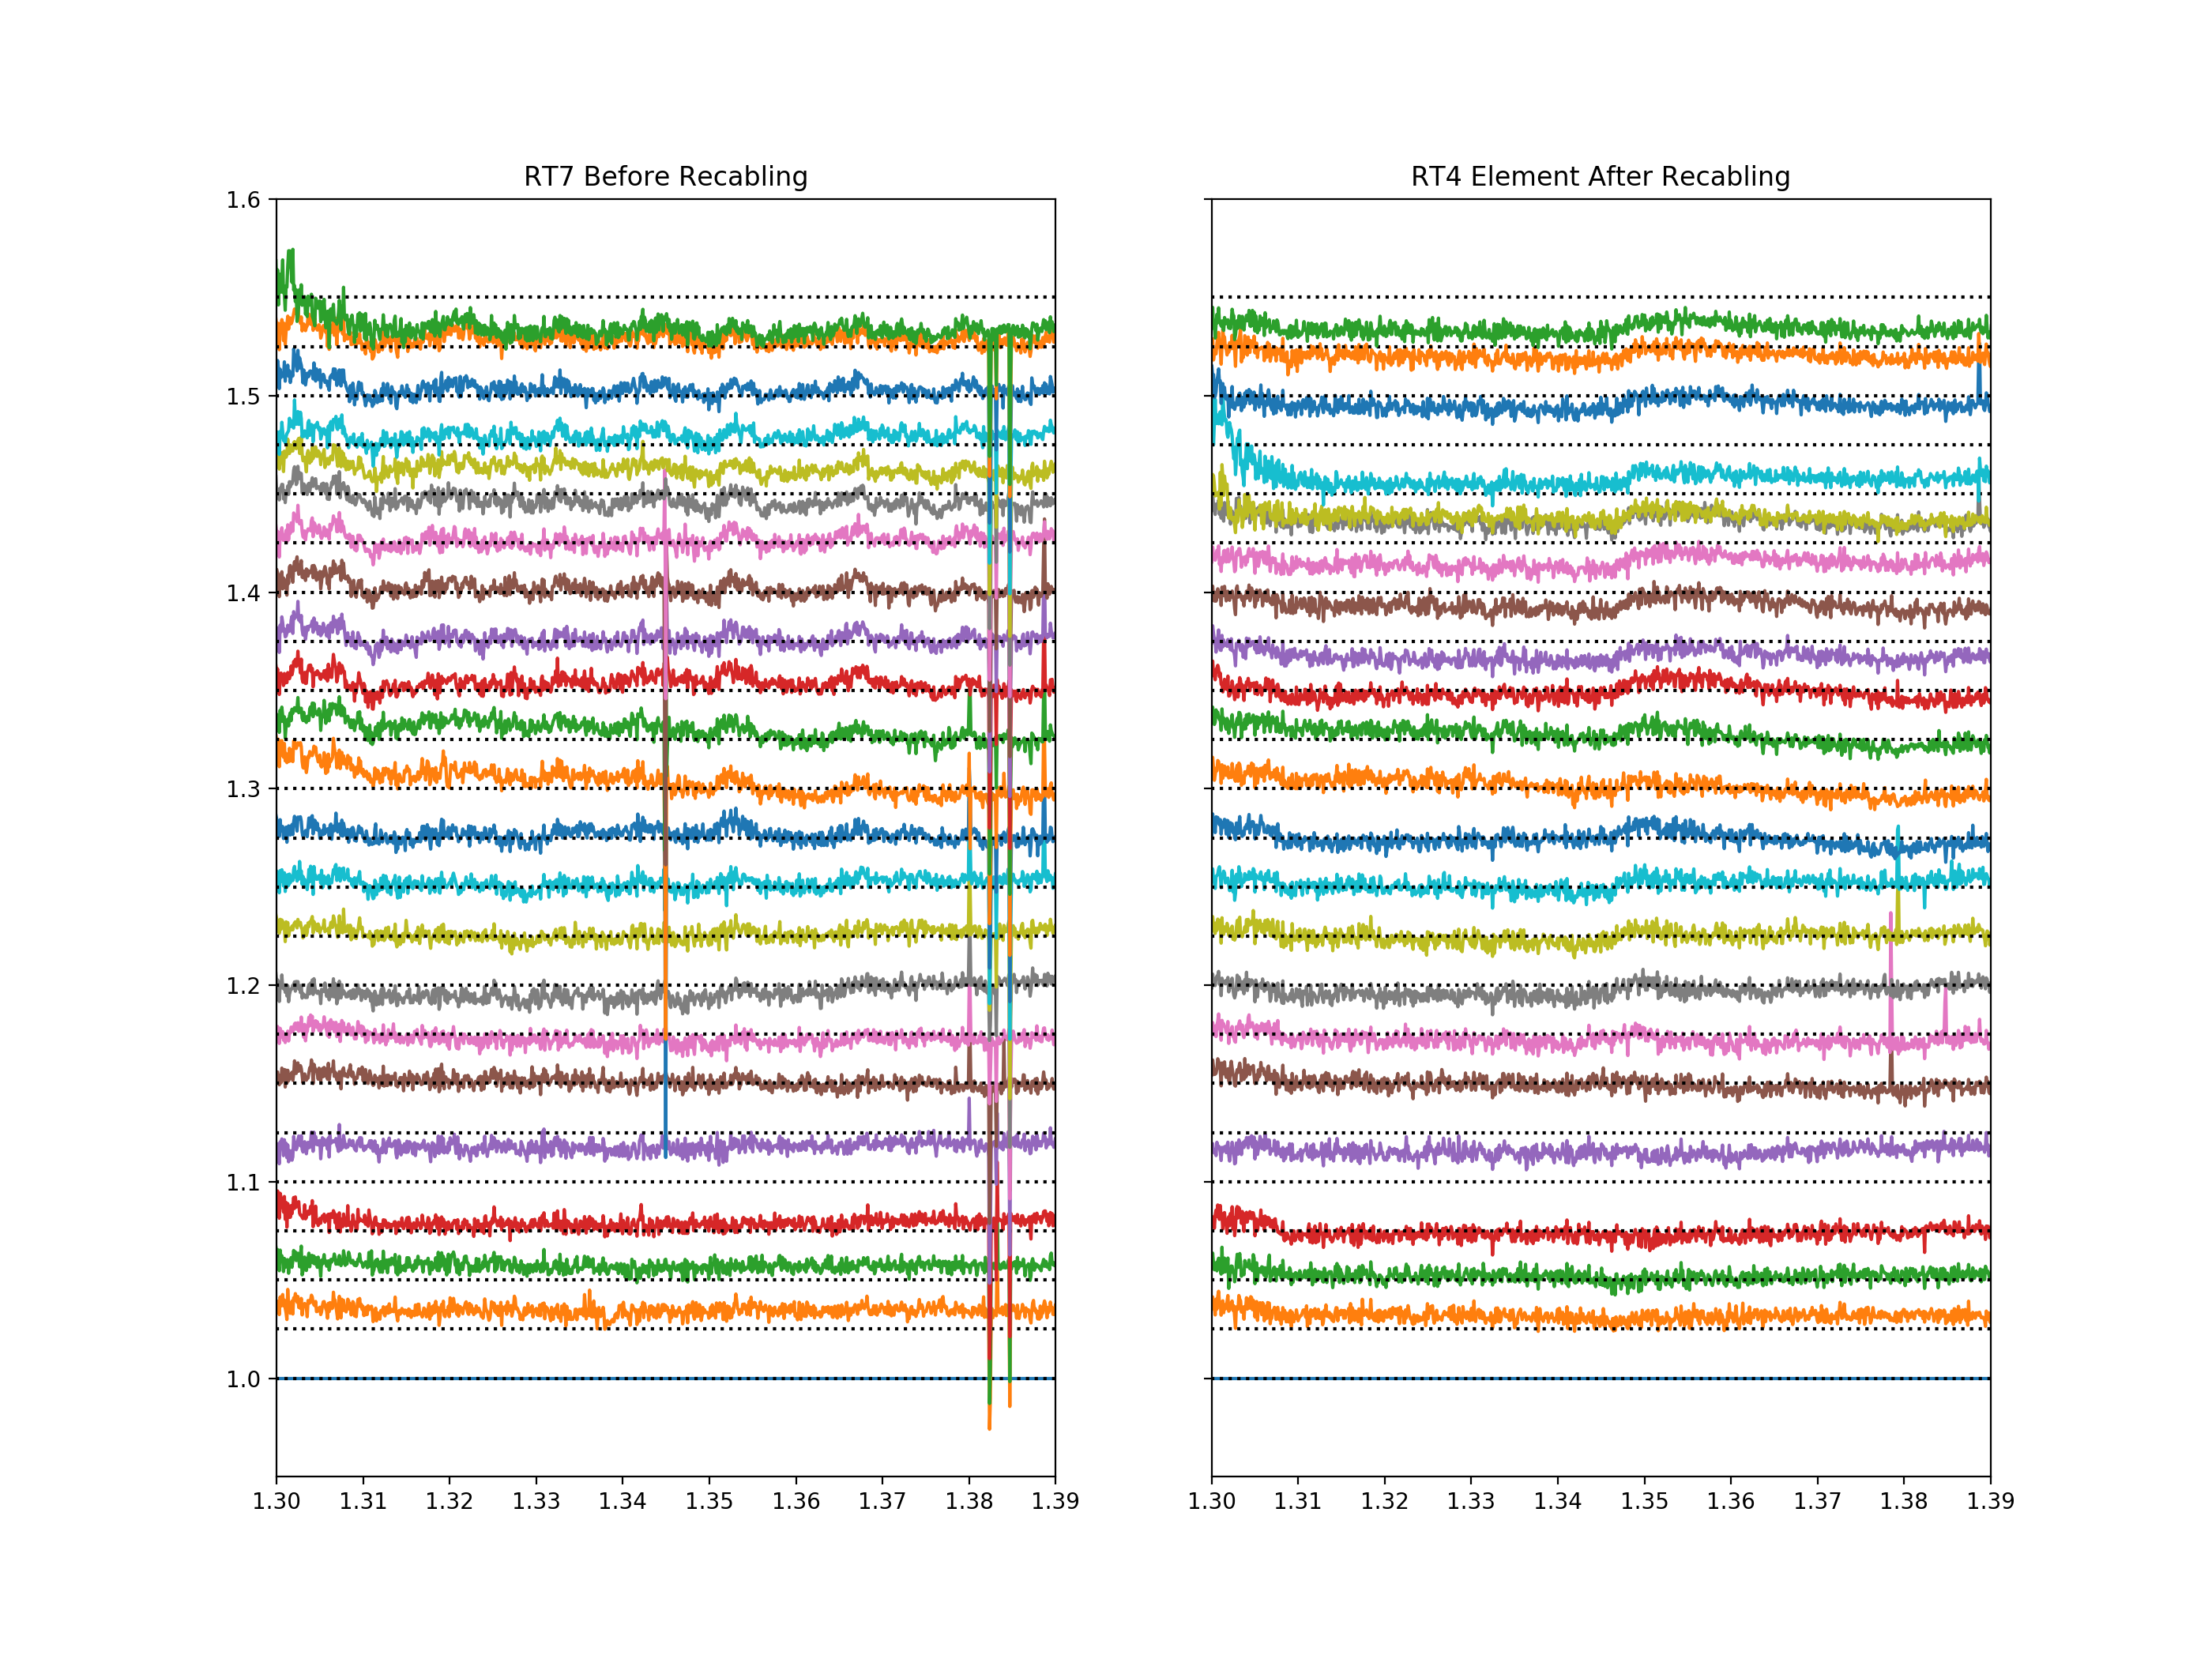

In [17]:
#make a plot just for RT7, showing element beam 0 before and after recabling
##now make a plot just for RT4, picking common frequency range of 1300-1390, showing the three observations side-by-side
offset=0.025
ymin=0.95
ymax=1.6
plotsize = 7


ysize=plotsize*1.5
xsize=plotsize*2
fig, (axb,axa)= plt.subplots(1,2,figsize=(xsize,ysize),sharex=True,sharey=True)
plt.title('RT7, Element beam 00, Channel averaging = 8')
xmin = 1.3 #np.nanmin(avfreqs_brc)
xmax = 1.39 #np.nanmax(avfreqs_brc)



for sol in range(normvals_before.shape[2]):
    axb.plot(avfreqs_before, (normvals_before[5,:,sol] + np.full(normvals_before.shape[1],offset*sol)))
    axb.plot(avfreqs_before, np.full(normvals_before.shape[1],1.+offset*sol),'k:')
axb.set_title('RT7 Before Recabling')  
axb.axis([xmin,xmax,ymin,ymax]) # Limit the plot to the minimum and maximum frequencies


for sol in range(normvals_after.shape[2]):
    axa.plot(avfreqs_after, (normvals_after[5,:,sol] + np.full(normvals_after.shape[1],offset*sol)))
    axa.plot(avfreqs_after, np.full(normvals_after.shape[1],1.+offset*sol),'k:')
axa.set_title('RT4 Element After Recabling') 

plt.savefig('RT7_EB0_comp.png')